# **IMPORTING LIBRARIES**

In [ ]:
!pip install pydub -q

In [ ]:
!pip install audiomentations -q

In [ ]:
# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
# Libraries for Classification and building Models

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Audio augmentation
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

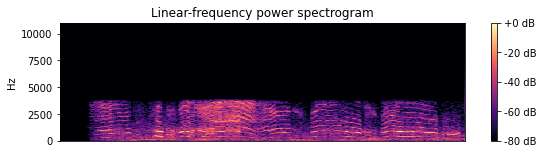

In [ ]:
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/CRYING/03abcb8f-400a-47d8-ad82-7e4586cc06be-1431864192133-1.7-f-48-hu.wav')
dat2, sampling_rate2 = librosa.load('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/NON CRY/silence.wav_99.wav')

plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

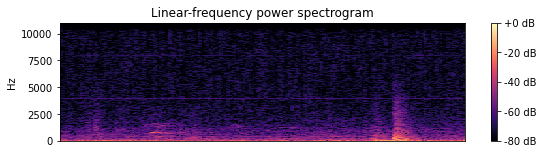

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# **AUGMENTATION**

In [ ]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])

In [ ]:
augmented_samples = augment(samples=dat1, sample_rate=sampling_rate1)

In [ ]:
augmented_samples

array([-0.00023739, -0.00034866,  0.00026176, ..., -0.11738878,
       -0.17073558, -0.20163906], dtype=float32)

In [ ]:
dat1

array([ 1.2662281e-06,  1.4249257e-06, -1.5742867e-08, ...,
        2.6889476e-01,  1.9018181e-01,  8.9544818e-02], dtype=float32)

In [ ]:
arr = librosa.feature.mfcc(y=augmented_samples, sr=sampling_rate1)

In [ ]:
arr.shape

(20, 301)

# **FEATURE EXTRACTION AND STRUCTURING DATA**

*shown for two sample audio files*

**NOISE FROM BABY_CRY_DETECTION DATASET**

In [ ]:
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/NON CRY/3-203371-A.ogg')
arr = librosa.feature.mfcc(y=dat1, sr=sampling_rate1)
arr

array([[ -77.2492   ,   63.2879   ,  105.3621   , ..., -568.58215  ,
        -568.58215  , -568.58215  ],
       [  53.554672 ,   42.192978 ,   36.989784 , ...,    0.       ,
           0.       ,    0.       ],
       [  32.595615 ,   24.362213 ,   19.120441 , ...,    0.       ,
           0.       ,    0.       ],
       ...,
       [   6.927981 ,    4.7419786,    5.383134 , ...,    0.       ,
           0.       ,    0.       ],
       [  -6.590155 ,  -10.944663 ,  -10.81192  , ...,    0.       ,
           0.       ,    0.       ],
       [   6.2779713,   -1.9408712,   -4.347613 , ...,    0.       ,
           0.       ,    0.       ]], dtype=float32)

In [ ]:
arr.shape

(20, 216)

**CRY FROM BABY_CRY_DETECTION DATASET**

In [ ]:
dat2, sampling_rate2 = librosa.load('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/NON CRY/1-21421-A.ogg')
arr = librosa.feature.mfcc(y=dat2, sr=sampling_rate2)
arr

array([[-110.90143  ,  -60.361828 ,   28.556686 , ..., -131.37778  ,
        -125.41724  , -122.44297  ],
       [ 144.27023  ,  116.23033  ,   97.277115 , ...,  152.61975  ,
         148.24826  ,  147.66962  ],
       [ -17.457365 ,  -15.201065 ,  -39.30448  , ...,  -16.081543 ,
         -14.252346 ,  -13.417192 ],
       ...,
       [   8.555389 ,   15.76634  ,   14.895472 , ...,   12.688705 ,
          12.554771 ,   17.614264 ],
       [  16.206345 ,    7.9274416,    8.181476 , ...,    7.8998456,
           6.5298014,   12.471178 ],
       [  13.127066 ,   12.373606 ,   17.13013  , ...,   12.515691 ,
          15.785458 ,   14.197942 ]], dtype=float32)

In [ ]:
arr.shape

(20, 216)

**LAUGH FROM BABY_CRY_DETECTION DATASET**

In [ ]:
dat3, sampling_rate3 = librosa.load('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/NON CRY/laugh_1.m4a_30.wav')
arr = librosa.feature.melspectrogram(y=dat3, sr=sampling_rate3)
arr

array([[1.84961548e-03, 4.92915162e-04, 2.21499315e-04, ...,
        1.50550157e-03, 1.39931127e-01, 1.87763143e+00],
       [8.74646846e-03, 2.72361771e-03, 2.34294636e-03, ...,
        2.39453255e-03, 1.64547861e-01, 2.16855335e+00],
       [3.32523882e-02, 4.23564799e-02, 5.58087863e-02, ...,
        1.48475608e-02, 2.02740997e-01, 2.60245800e+00],
       ...,
       [7.48923558e-05, 4.26185325e-05, 3.19506980e-05, ...,
        1.24901254e-02, 5.92269339e-02, 5.23056239e-02],
       [3.14360987e-05, 1.46985985e-05, 9.20910315e-06, ...,
        1.59187079e-03, 8.36209580e-03, 8.22646543e-03],
       [2.12328578e-05, 6.04338857e-06, 3.78050458e-07, ...,
        2.44714738e-05, 1.98665410e-04, 4.54974332e-04]], dtype=float32)

In [ ]:
arr.shape

(128, 216)

**SILENCE FROM BABY_CRY_DETECTION DATASET**

In [ ]:
dat4, sampling_rate4 = librosa.load('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/NON CRY/silence.wav_78.wav')
arr = librosa.feature.melspectrogram(y=dat4, sr=sampling_rate4)
arr

array([[6.69134888e+02, 3.52329529e+02, 3.16828705e+02, ...,
        3.24125549e+02, 2.86033447e+02, 6.37424927e+01],
       [9.76591721e+01, 1.02769753e+02, 4.22190887e+02, ...,
        8.30444519e+02, 9.80921021e+02, 8.42720337e+02],
       [2.64451141e+01, 1.67376709e+01, 7.00955353e+01, ...,
        1.63034515e+02, 1.72458786e+02, 1.84474457e+02],
       ...,
       [7.04084232e-04, 5.01324132e-04, 7.63047137e-04, ...,
        8.18179338e-04, 6.91414869e-04, 9.83685371e-04],
       [1.17898313e-03, 4.10853710e-04, 1.75096357e-04, ...,
        1.78518414e-04, 2.15662265e-04, 4.15552000e-04],
       [1.86423853e-03, 4.71926120e-04, 9.47376429e-06, ...,
        1.33544245e-05, 1.66298978e-05, 5.54049802e-05]], dtype=float32)

In [ ]:
arr.shape

(128, 216)

# **EXTRACT MFCC** 

In [ ]:
feature = []
label = []
path = '/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/CRYING'
files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/CRYING') #gets the list of file names
for i in files:
  X, sample_rate = librosa.load(os.path.join(path,i), res_type='kaiser_fast')
  augmented_X = augment(samples=X, sample_rate=sample_rate)
  # We extract mfcc feature from data
  mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T,axis=0)
  mfcc_augmented = np.mean(librosa.feature.mfcc(y=augmented_X, sr=sample_rate).T,axis=0)        
  feature.append(mfcc)
  feature.append(mfcc_augmented)
  label.append("CRYING")
  label.append("CRYING")

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/NON CRY'
files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Baby cry /Dataset_layer1/NON CRY') #gets the list of file names
for i in files:
  X, sample_rate = librosa.load(os.path.join(path,i), res_type='kaiser_fast')
  augmented_X = augment(samples=X, sample_rate=sample_rate)
  # We extract mfcc feature from data
  mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T,axis=0)
  mfcc_augmented = np.mean(librosa.feature.mfcc(y=augmented_X, sr=sample_rate).T,axis=0)        
  feature.append(mfcc)
  feature.append(mfcc_augmented)
  label.append("NON CRY")
  label.append("NON CRY")

In [ ]:
len(feature)

1778

In [ ]:
len(label)

1778

In [ ]:
feature[0].shape

(20,)

In [ ]:
new_label = {'CRYING':1,'NON CRY':0} 
name_label = []
for i in label:
    name_label.append(new_label[i])

In [ ]:
print(name_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
temp = feature,name_label
temp = np.array(temp)
data = temp.transpose()
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(1778, 2)

In [ ]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)

(1778,) (1778,)


In [ ]:
X = np.empty([1778, 20])

In [ ]:
for i in range(1778):
    X[i] = (X_[i])

In [ ]:
Y = to_categorical(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(1778, 20)
(1778, 2)


# **SHAPING AND SPLITTING**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
X_train.shape

(1333, 20)

In [ ]:
X_test.shape

(445, 20)

In [ ]:
Y_train.shape

(1333, 2)

In [ ]:
Y_test.shape

(445, 2)

In [ ]:
X_train = X_train.reshape(1333, 10, 2)
X_test = X_test.reshape(445, 10, 2)

In [ ]:
X_train.shape

(1333, 10, 2)

In [ ]:
X_test.shape

(445, 10, 2)

# **TRAINING THE MODEL**

# *Sequential model*

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = (10,2,1)))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(2, activation = "softmax"))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
class MyThresholdCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [ ]:
#callback = MyThresholdCallback(threshold=0.95)

In [ ]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/10
27/27 [==============================] - 1s 12ms/step - loss: 0.3706 - accuracy: 0.8342 - val_loss: 0.2150 - val_accuracy: 0.9034
Epoch 2/10
27/27 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.9055 - val_loss: 0.2127 - val_accuracy: 0.9191
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 0.1589 - accuracy: 0.9362 - val_loss: 0.1729 - val_accuracy: 0.9393
Epoch 4/10
27/27 [==============================] - 0s 6ms/step - loss: 0.1348 - accuracy: 0.9452 - val_loss: 0.1826 - val_accuracy: 0.9281
Epoch 5/10
27/27 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9497 - val_loss: 0.1422 - val_accuracy: 0.9416
Epoch 6/10
27/27 [==============================] - 0s 5ms/step - loss: 0.1037 - accuracy: 0.9572 - val_loss: 0.1323 - val_accuracy: 0.9506
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0694 - accuracy: 0.9775 - val_loss: 0.1637 - val_accuracy: 0.9438
Epoch 8/10
27/27 [=

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

14/14 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9528
[0.1888425499200821, 0.9528089761734009]


In [ ]:
y_pred_model = model.predict(X_test)
y_pred_model=np.argmax(y_pred_model, axis=1)
y_test_pred=np.argmax(Y_test, axis=1)
cm_model = confusion_matrix(y_test_pred, y_pred_model)

print(cm_model)

[[160  15]
 [  6 264]]


In [ ]:
print(classification_report(y_test_pred, y_pred_model))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       175
           1       0.95      0.98      0.96       270

    accuracy                           0.95       445
   macro avg       0.96      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



# *RNN LSTM model*

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
input_shape=(10,2)
model = keras.Sequential()
model.add(LSTM(128, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(32, recurrent_dropout=0.35, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 128)           67072     
                                                                 
 lstm_5 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 128)               4224      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=72,validation_data=(X_test, Y_test), shuffle=False)

Epoch 1/20
19/19 [==============================] - 6s 105ms/step - loss: 0.6016 - acc: 0.7299 - val_loss: 0.4531 - val_acc: 0.7933
Epoch 2/20
19/19 [==============================] - 1s 77ms/step - loss: 0.3915 - acc: 0.8335 - val_loss: 0.2943 - val_acc: 0.8517
Epoch 3/20
19/19 [==============================] - 1s 78ms/step - loss: 0.3171 - acc: 0.8492 - val_loss: 0.2479 - val_acc: 0.8764
Epoch 4/20
19/19 [==============================] - 1s 78ms/step - loss: 0.2599 - acc: 0.8822 - val_loss: 0.2347 - val_acc: 0.8966
Epoch 5/20
19/19 [==============================] - 2s 106ms/step - loss: 0.2393 - acc: 0.8935 - val_loss: 0.1963 - val_acc: 0.9056
Epoch 6/20
19/19 [==============================] - 3s 180ms/step - loss: 0.2182 - acc: 0.9017 - val_loss: 0.1906 - val_acc: 0.9191
Epoch 7/20
19/19 [==============================] - 4s 203ms/step - loss: 0.2278 - acc: 0.8860 - val_loss: 0.1912 - val_acc: 0.9146
Epoch 8/20
19/19 [==============================] - 2s 99ms/step - loss: 0.2117

In [ ]:
y_pred_model = model.predict(X_test)
y_pred_model=np.argmax(y_pred_model, axis=1)
y_test_pred=np.argmax(Y_test, axis=1)
cm_model = confusion_matrix(y_test_pred, y_pred_model)

print(cm_model)

[[167   8]
 [ 21 249]]


In [ ]:
print(classification_report(y_test_pred, y_pred_model))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       175
           1       0.97      0.92      0.94       270

    accuracy                           0.93       445
   macro avg       0.93      0.94      0.93       445
weighted avg       0.94      0.93      0.94       445



# ATTENTION MODEL

In [ ]:
'''input_shape=(10,2)
model = tensorflow.keras.Sequential()
model.add(LSTM(128, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(32, recurrent_dropout=0.35, return_sequences=False))
model.add(Dropout(0.2))
#adding attention
model.add(SeqWeightedAttention())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
'''

In [ ]:
'''def create_Custom_Model(hidden_units,dense_units,input_shape,activation,model_input):

  x = Input(shape = input_shape)
  lstm1_op = LSTM(128, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape)(model_input)
  lstm2_op = LSTM(32, recurrent_dropout=0.35, return_sequences=False)(lstm1_op)
  dp1 = Dropout(0.2)(lstm2_op)
  attn = tf.keras.layers.Attention()(dp1)
  dense1 = Dense(128, activation='relu')(attn)
  dense2 = Dense(64, activation='relu')(dense1)
  dp2 = Dropout(0.4)(dense2)
  dense3 = Dense(128, activation='relu')(dp2)
  dense4 = Dense(64, activation='relu')(dense3)
  dp3 = Dropout(0.4)(dense4)
  dense5 = Dense(48, activation='relu')(dp3)
  dp4 = Dropout(0.4)(dense5)
  dense6 = Dense(2, activation='softmax')(dp4)
  model = Model()'''

In [ ]:
pip install keras_self_attention -q

In [ ]:
from keras_self_attention import SeqSelfAttention

In [ ]:
input_shape=(10,2)
model = tensorflow.keras.Sequential()
model.add(LSTM(128, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
#model.add(LSTM(32, recurrent_dropout=0.35, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
#flatten
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])  


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 128)           67072     
                                                                 
 seq_self_attention_2 (SeqSe  (None, 10, 128)          8257      
 lfAttention)                                                    
                                                                 
 dropout_27 (Dropout)        (None, 10, 128)           0         
                                                                 
 dense_44 (Dense)            (None, 10, 128)           16512     
                                                                 
 dense_45 (Dense)            (None, 10, 64)            8256      
                                                                 
 dropout_28 (Dropout)        (None, 10, 64)            0         
                                                     

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=72,validation_data=(X_test, Y_test), shuffle=False)

Epoch 1/20
19/19 [==============================] - 4s 69ms/step - loss: 0.4894 - acc: 0.7434 - val_loss: 0.3192 - val_acc: 0.8270
Epoch 2/20
19/19 [==============================] - 1s 42ms/step - loss: 0.3300 - acc: 0.8147 - val_loss: 0.2705 - val_acc: 0.8831
Epoch 3/20
19/19 [==============================] - 1s 41ms/step - loss: 0.2786 - acc: 0.8530 - val_loss: 0.2083 - val_acc: 0.9079
Epoch 4/20
19/19 [==============================] - 1s 42ms/step - loss: 0.2456 - acc: 0.8785 - val_loss: 0.1929 - val_acc: 0.9213
Epoch 5/20
19/19 [==============================] - 1s 43ms/step - loss: 0.2281 - acc: 0.8965 - val_loss: 0.1630 - val_acc: 0.9258
Epoch 6/20
19/19 [==============================] - 1s 42ms/step - loss: 0.1946 - acc: 0.9040 - val_loss: 0.1587 - val_acc: 0.9236
Epoch 7/20
19/19 [==============================] - 1s 44ms/step - loss: 0.1691 - acc: 0.9212 - val_loss: 0.1400 - val_acc: 0.9348
Epoch 8/20
19/19 [==============================] - 1s 42ms/step - loss: 0.1669 - a

In [ ]:
y_pred_model = model.predict(X_test)
y_pred_model=np.argmax(y_pred_model, axis=1)
y_test_pred=np.argmax(Y_test, axis=1)
cm_model = confusion_matrix(y_test_pred, y_pred_model)

print(cm_model)

[[152  23]
 [  7 263]]


In [ ]:
print(classification_report(y_test_pred, y_pred_model))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       175
           1       0.92      0.97      0.95       270

    accuracy                           0.93       445
   macro avg       0.94      0.92      0.93       445
weighted avg       0.93      0.93      0.93       445

